# Introduction to Markov Chains

-----

In this notebook, we introduce the concept of a [Markov chain][wmc] and demonstrate how they can be used to model real-world, stochastic situations. Much of this content is based on the presentation developed by Dustin Stansbury in a blog article entitlted [_A Brief Introduction to Markov Chains_][ba].

-----

[wmc]: https://en.wikipedia.org/wiki/Markov_chain
[ba]: https://theclevermachine.wordpress.com/2012/09/24/a-brief-introduction-to-markov-chains/

## Table of Contents

[Discrete Markov Chain](#Discrete-Markov-Chain)

[Continuous Markov Chain](#Continuous-Markov-Chain)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Discrete Markov Chain

We can create a discrete Markov chain, by defining a set of discrete states along with transition probabilities. In this case, we eventually reach a stable configuration. This is demonstrate in the following example, where we have a three state Markov chain: sunny, cloudy, or rainy. We define the transition probabilities between these three states, and generate the Markov chain for this system. As the output demonstrates, after about five transitions, we have constant probability for each of the three possible states.

-----
[wcn]: https://en.wikipedia.org/




In [2]:
# Number of days in simulations
num_days = 15

# Define state for today (rainy)
today = [0, 0, 1]

# Define state transition probabilities
# Sunny, Cloudy, Rainy (In each dimension)
# --------------------
# SS SC SR
# CS CC CR
# RS RC RR

stp = [[0.50, 0.35, 0.15], 
       [0.30, 0.50, 0.20], 
       [0.40, 0.20, 0.40]]

# Transform to an array
stp_array = np.array(stp)

# Create empty state array
state = np.zeros((num_days, 3))

# Define initial state
state[0] = np.array(today)

print('Day   Sunny    Cloudy    Rainy')
print(30*'-')

for idx in range(1, num_days):

    # Transition to next state
    state[idx] = state[idx - 1].dot(stp_array)
    
    # Display new state probabilities
    print(f'{idx:3d}  {state[idx][0]:5.4f}   {state[idx][1]:5.4f}    {state[idx][2]:5.4f}')

Day   Sunny    Cloudy    Rainy
------------------------------
  1  0.4000   0.2000    0.4000
  2  0.4200   0.3200    0.2600
  3  0.4100   0.3590    0.2310
  4  0.4051   0.3692    0.2257
  5  0.4036   0.3715    0.2249
  6  0.4032   0.3720    0.2248
  7  0.4031   0.3721    0.2248
  8  0.4031   0.3721    0.2248
  9  0.4031   0.3721    0.2248
 10  0.4031   0.3721    0.2248
 11  0.4031   0.3721    0.2248
 12  0.4031   0.3721    0.2248
 13  0.4031   0.3721    0.2248
 14  0.4031   0.3721    0.2248


-----

We can view the chains graphically, by plotting the evolution of the states, as shown in the following Code cell. In this case, we also mark the burn-in phase where the system moves from the initial, random state to steady-state system. In this discrete example, we have a consistent final state for the system, which is the same regardless of the initial condition.  


-----

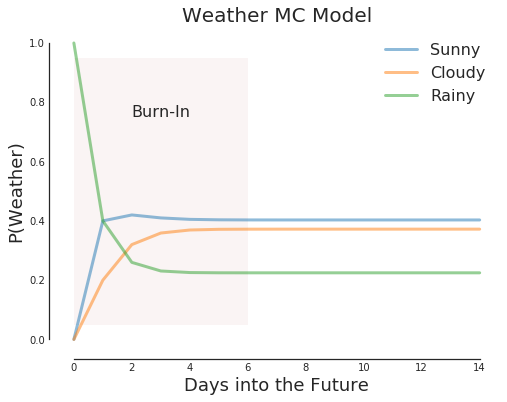

In [3]:
# State Labels
lbls = ['Sunny', 'Cloudy', 'Rainy']

# Create figureb
fig, ax = plt.subplots(figsize=(8,6))

# Plot each state's probability
for idx in range(3):
    ax.plot(range(num_days), state[:,idx], alpha=0.5, lw=3, label=lbls[idx])

# Mark burn-in regime (hard-coded to initial example)
ax.fill_betweenx([0.05, 0.95], 0, 6, facecolor='brown', alpha=0.05)
ax.text(3, 0.75, 'Burn-In', fontdict={'size': 16}, horizontalalignment='center')

# Decorate plot
ax.set(title='Weather MC Model', 
       xlabel='Days into the Future', 
       ylabel='P(Weather)')

ax.legend()
sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Continuous Markov Chain

Markov chains can also be generated from probability density functions, which creates continuous Markov chains (in this case, the state space is continuous). This is demonstrated in the next Code cell, where we employ a Gaussian model to create the Markov chain. In this case, we also create an arbitrary number of chains (four, by default). Both the initial state and the generative model employ a normal distribution. The generative model uses the current state to define the next state by using it to define the mean of the generative normal distribution. The output of the Code cell shows the first five states of all chains, showing they start at the same state, but quickly move to different states.


-----
[wcn]: https://en.wikipedia.org/



In [4]:
from numpy.random import RandomState
rng = RandomState(23)

num_samples = 5000
num_chains = 4

burnin = 500

# Create empty state array
state = np.zeros((num_samples, num_chains))

# Define initial state
state[0] = rng.normal()

for idx in range(1, num_samples):

    # Transition to next state
    state[idx] = rng.normal(0.5 * state[idx - 1], 1, num_chains)

print('First five states:')
print(65*'-')
print(state[:5])

First five states:
-----------------------------------------------------------------
[[ 0.66698806  0.66698806  0.66698806  0.66698806]
 [ 0.35930711 -0.44412539  1.28212785  1.03516582]
 [-0.87142801 -0.58961081 -0.49639577 -0.80456461]
 [ 1.33654427 -0.6422644   0.42194228 -0.08001079]
 [ 0.72861507 -1.3645822  -0.79897074  0.40173098]]


-----

Often with Markov chains, the statistical variation fluctuate significantly at the start. As a result, we often ignore a fixed number of state changes. This process is known as the burn-in. We demonstrate the use of a burn-in phase in the following Code cell where we arbitrarily set the burn-in transition at 500. The following plot shows the pre and post burn-in regions. In this case, there is no change over the transition, which reflects the facts that 500 was an arbitrary choice and that our generative model did not require a burn-in phase.

-----

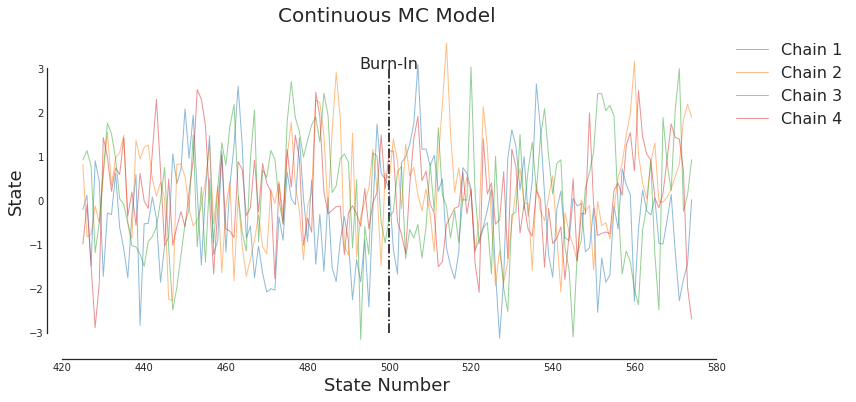

In [5]:
# State Labels
lbls = [f'Chain {idx}' for idx in range (1, num_chains + 1)]

# Define plot width
delta = 75
min = burnin - delta
max = burnin + delta

# Create zoomed-in figure around burn-in
fig, ax = plt.subplots(figsize=(12,6))

# Plot each chain's state
for idx in range(num_chains):
    ax.plot(np.arange(min, max), state[min:max, idx], alpha=0.5, lw=1, label=lbls[idx])

# Mark burn-in regime (hard-coded to initial example)
ax.vlines(burnin, -3.0, 3.0, linestyles='-.')
ax.text(burnin, 3, 'Burn-In', fontdict={'size': 16}, horizontalalignment='center')

# Decorate plot
ax.set(title='Continuous MC Model', 
       xlabel='State Number', 
       ylabel='State')

ax.legend(bbox_to_anchor=(1., 1.))
sns.despine(offset=5, trim=True)

-----

The different chains can be compared by plotting the evolution of the states for each chain. This is shown by the following Code cell, where we plot the states post burn-in for each chain. The chains overlap tremendously, and show a tendency to quickly return to the central regime. This demonstrates the _statistical pull_ that draws chains to specific regions. In this case it is their starting region, because of the use of the normal distribution.

-----

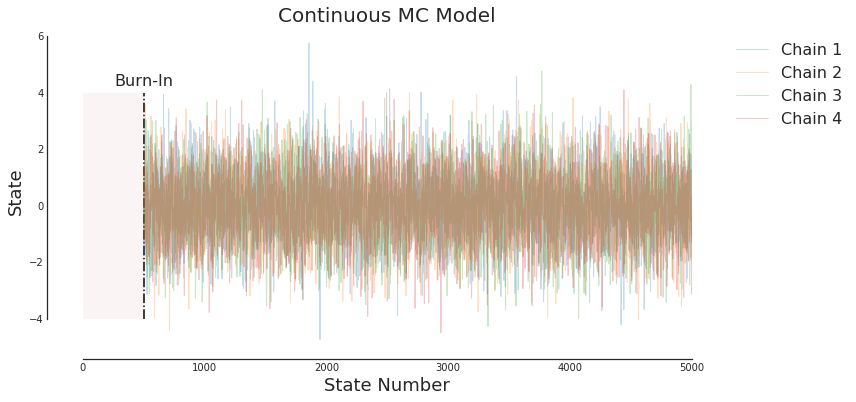

In [6]:
# Create full figure (starting after burn-in)
fig, ax = plt.subplots(figsize=(12,6))
        
# Plot each chain's state
for idx in range(num_chains):
    ax.plot(np.arange(burnin, num_samples), 
            state[burnin:num_samples, idx], 
            alpha=0.25, lw=1, label=lbls[idx])

# Draw Burn-in transition
# Mark burn-in regime (hard-coded to initial example)
ax.vlines(burnin, -4.0, 4.0, linestyles='-.')
ax.text(burnin, 4.25, 'Burn-In', fontdict={'size': 16}, horizontalalignment='center')
ax.fill_betweenx([-4.0, 4.0], 0, burnin, facecolor='brown', alpha=0.05)

# Decorate plot
ax.set(title='Continuous MC Model', 
       xlabel='State Number', 
       ylabel='State')

ax.legend(bbox_to_anchor=(1., 1.))
sns.despine(offset=5, trim=True)

-----

We can start to compare the chains by creating a DataFrame from the generated states. The following Code cell creates a DataFrame from the post burn-in chain, and generates descriptive statistics for each chain by using the `describe` method. The summary statistics are all similar, which is expected given the common generative process. The distribution measures are also similar, with small variations, especially in the minimum and maximum.

-----

In [7]:
df = pd.DataFrame(state[burnin:])
df.describe()

,0,1,2,3
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.013429,-0.044635,-0.009349,-0.041726
std,1.163447,1.164683,1.184667,1.153380
min,-4.726051,-4.419695,-4.267644,-4.484523
25%,-0.777580,-0.830908,-0.801433,-0.826656
50%,0.001247,-0.034503,0.028895,-0.059294
75%,0.770028,0.738750,0.802589,0.707307
max,5.754189,4.005871,4.762078,4.095605


-----

With the chains contained within a DataFrame, we can easily compare the chain distributions by using a violin plot. The following Code cell uses the Seaborn library's `violinplot` function to compare the distributions of the different generated state samples. While there are small variations, the overall shape of all distributions are extremely similar, looking like normal distributions with varying variances.

-----

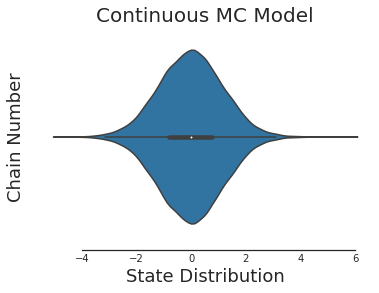

In [8]:
# Plot distributions
ax = sns.violinplot(df, innner='box', orient='h')

# Decorate plot
ax.set(title='Continuous MC Model', 
       ylabel='Chain Number', 
       xlabel='State Distribution')

sns.despine(offset=5, trim=True)

-----

In the following Code cell, we take one chain (chain zero) and generate a histogram along with an kernel density estimate over the different states. We also compute and display the mean and standard deviation for this chain over the post burn-in states. Recall that our initial state was sampled from a standard normal distribution and subsequent states were computed from a normal distribution using the current state. Thus, we would expect the mean and standard deviation of the samples states to be close to a standard normal distribution, which is the actual result for this chain.

-----

Mean = 0.009, Std = 1.162


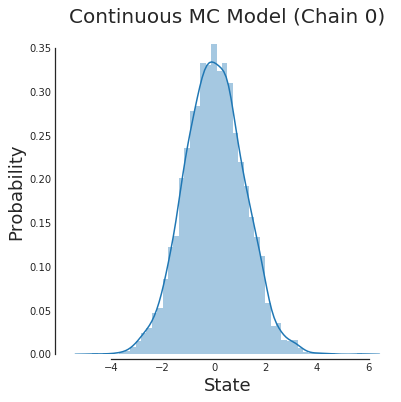

In [9]:
# Pick one chain
cn = 0

# Create full figure (starting after burn-in)
fig, ax = plt.subplots(figsize=(6,6))

x = state[:,cn]
mean_x = np.mean(x)
std_x = np.std(x)

sns.distplot(x)

print(f'Mean = {mean_x:4.3f}, Std = {std_x:4.3f}')

# Decorate plot
ax.set(title=f'Continuous MC Model (Chain {cn})', 
       xlabel='State', 
       ylabel='Probability')

ax.legend(bbox_to_anchor=(1., 1.))
sns.despine(offset=5, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced Markov chains, and demonstrated how they can be used to model a real world process. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the DataFrame to only include data from the burn-in phase. How do the resulting distribution visualizations change?
2. Compute the difference between any two chains for the whole sample, and plot the resulting distribution. How does the difference change?
23. Compute the difference between any two chains for only the burin-in phase, and plot the resulting distribution. How does the difference change?

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia article on [Markov chains][wmc]
2. Blog article introducing [Markov chains][imc]
4. Wikipedia article on [hidden Markov models][whmm]
5. Blog article on [hidden Markov models][qhmm] with application to financial markets
6. Python [hidden markov model][phmm] library, based on scikit-learn
8. Blog article introducing [hidden Markov models][hmmi]

-----

[wmc]: https://en.wikipedia.org/wiki/Markov_chain
[whmm]: https://en.wikipedia.org/wiki/Hidden_Markov_model
[phmm]: http://hmmlearn.readthedocs.io/en/latest/

[qhmm]: https://www.quantstart.com/articles/hidden-markov-models-an-introduction

[hmmi]: https://theclevermachine.wordpress.com/2012/10/05/mcmc-the-metropolis-sampler/

[imc]: https://theclevermachine.wordpress.com/2012/09/24/a-brief-introduction-to-markov-chains/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode